Mixed Weibull

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 100/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         8.65511        0.393835   7.91662   9.46248
      Beta 1         3.91197        0.509776   3.03021    5.0503
     Alpha 2         38.1102         1.41075   35.4431   40.9781
      Beta 2         3.82192        0.421385   3.07916   4.74385
Proportion 1        0.388491       0.0502663  0.295595  0.490263 

Goodness of fit    Value
 Log-likelihood -375.991
           AICc  762.619
            BIC  775.007
             AD 0.418649 



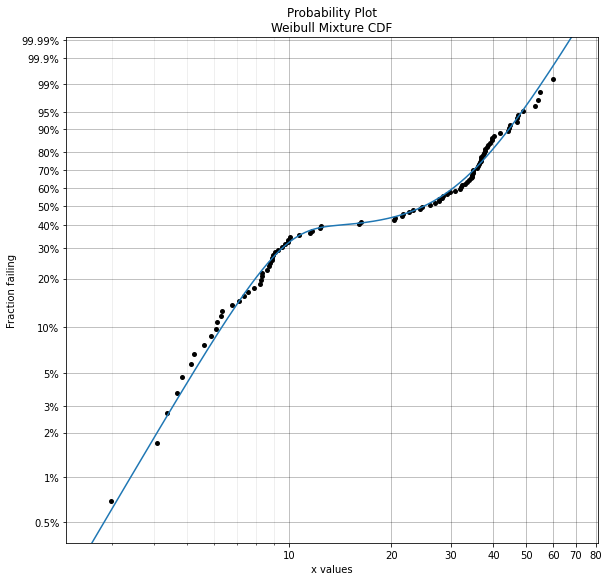

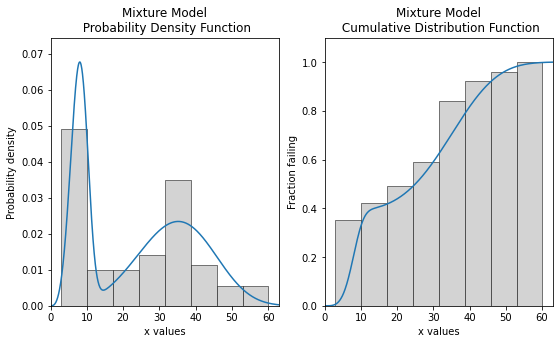

In [1]:
from reliability.Fitters import Fit_Weibull_Mixture
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram
import numpy as np
import matplotlib.pyplot as plt
# create some failures from two distributions
group_1 = Weibull_Distribution(alpha=10, beta=3).random_samples(40, seed=2)
group_2 = Weibull_Distribution(alpha=40, beta=4).random_samples(60, seed=2)
all_data = np.hstack([group_1, group_2]) # combine the data
results = Fit_Weibull_Mixture(failures=all_data) #fit the mixture model
# this section is to visualise the histogram with PDF and CDF
# it is not part of the default output from the Fitter
plt.figure(figsize=(9, 5))
plt.subplot(121)
histogram(all_data)
results.distribution.PDF()
plt.subplot(122)
histogram(all_data, cumulative=True)
results.distribution.CDF()
plt.show()

In [3]:
import pandas as pd
df_life=pd.read_csv("Lidar_Field_Failure_Data for python.csv")


fail = df_life['F'].dropna().tolist()
censor=df_life['S'].tolist()

df_life.describe()

,F,S
count,25,326
mean,7.39,15.0364
std,8.78665,14.0138
min,0.01,0.02
25%,0.83,4.175
50%,2.56,12.075
75%,12.38,20.89
max,32.47,90.86


Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 25/326 (92.87749% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1        0.842431         0.73099  0.153792    4.6146
      Beta 1        0.734759        0.252312  0.374841   1.44027
     Alpha 2         427.796         559.571   32.9487   5554.37
      Beta 2        0.921785        0.502348  0.316773   2.68232
Proportion 1        0.030744        0.021193  0.007808  0.113357 

Goodness of fit    Value
 Log-likelihood -147.318
           AICc   304.81
            BIC   323.94
             AD  495.114 



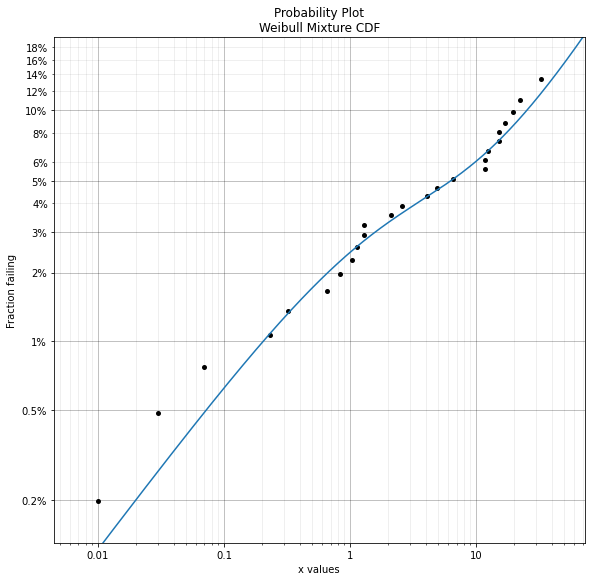

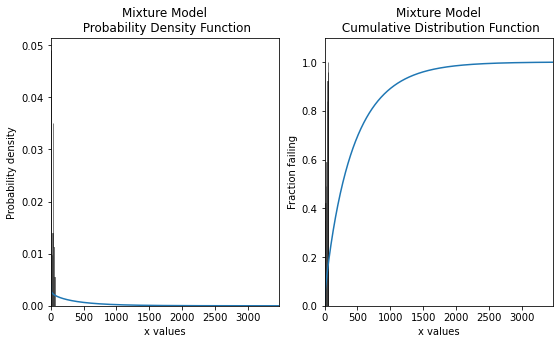

In [4]:
results = Fit_Weibull_Mixture(failures=fail, right_censored=censor) #fit the mixture model
# this section is to visualise the histogram with PDF and CDF
# it is not part of the default output from the Fitter
plt.figure(figsize=(9, 5))
plt.subplot(121)
histogram(all_data)
results.distribution.PDF()
plt.subplot(122)
histogram(all_data, cumulative=True)
results.distribution.CDF()
plt.show()